In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [26]:
df = pd.read_csv('cleaned.csv')

In [27]:
df = df.drop(columns=['Week Start','Cases - Cumulative','Percent Tested Positive - Weekly','Deaths - Cumulative','Death Rate - Cumulative',
       'Population','Percent Tested Positive - Cumulative','Test Rate - Weekly','Tests - Cumulative','Test Rate - Cumulative','Case Rate - Cumulative','Week End','Week Number','Test Rate - Cumulative','Row ID','ZIP Code Location', 'ZIP Code'])

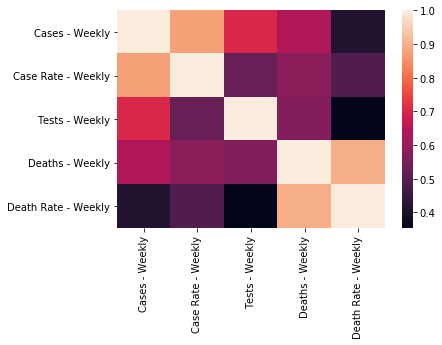

In [28]:
import seaborn as sb
sb.heatmap(df.corr())

In [29]:
#Fix Column Names
df.columns = df.columns.str.strip().str.lower().str.replace('-', '').str.replace(' ', '_').str.replace('__', '_')


In [30]:
X = df.drop('deaths_weekly', axis = 1)
y = df['deaths_weekly'].values.reshape(-1, 1)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
X_test.head()

,cases_weekly,case_rate_weekly,tests_weekly,death_rate_weekly
491,336,371,1273,8.8
175,64,90,295,8.4
479,8,14,41,0.0
735,54,132,139,7.3
557,63,126,177,0.0


In [39]:
y_test_list = []
for y in y_test:
    y_test_list.append(y[0])
predictions_list = []
for pred in predictions:
    predictions_list.append(pred[0])


In [42]:
comparison = pd.DataFrame({"Predicted": predictions_list, "Actual": y_test_list,"X_cases":X_test['cases_weekly'],"X_case_rate":X_test['case_rate_weekly'],"X_tests":X_test['tests_weekly'],"X_death_rate":X_test['death_rate_weekly']})
comparison.head()

,Predicted,Actual,X_cases,X_case_rate,X_tests,X_death_rate
491,9.925601,8,336,371,1273,8.8
175,4.614702,6,64,90,295,8.4
479,-0.047498,0,8,14,41,0.0
735,3.204231,3,54,132,139,7.3
557,0.317927,0,63,126,177,0.0


In [43]:
from sklearn.preprocessing import StandardScaler

X_test =[336,371,1273,8.8]

X_test =np.asarray(X_test)
X_test =X_test.reshape(1,-1)

predictions = model.predict(X_test)


predictions

array([[9.92560106]])

In [44]:
X_test =[336,371,1273,0]

X_test =np.asarray(X_test)
X_test =X_test.reshape(1,-1)

predictions = model.predict(X_test)


predictions

array([[6.03862631]])